In [2]:
import numpy as np
import pandas as pd

dataset=pd.read_csv('House_price.csv')

In [3]:
dataset.shape

(33656, 19)

In [4]:
dataset.isna().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [5]:
dataset.drop(columns=['ADDRESS','NEAREST_SCH_RANK'],inplace=True)
dataset.dropna(subset=['BUILD_YEAR'],inplace=True)
dataset.fillna({'GARAGE':dataset['GARAGE'].mode()[0]},inplace=True)

In [6]:
dataset.isna().sum()

SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

In [7]:
X=dataset.drop(columns=['PRICE','LATITUDE','LONGITUDE'])
X.columns

Index(['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN', 'NEAREST_STN_DIST',
       'DATE_SOLD', 'POSTCODE', 'NEAREST_SCH', 'NEAREST_SCH_DIST'],
      dtype='object')

In [8]:
Y=dataset['PRICE']
Y.head()

0    565000
1    365000
2    287000
3    255000
4    325000
Name: PRICE, dtype: int64

In [9]:
X.shape

(30501, 14)

In [10]:
Y.shape

(30501,)

In [11]:
X.value_counts('SUBURB')

SUBURB
Bertram          209
Iluka            208
Mindarie         204
Henley Brook     203
Jane Brook       199
                ... 
Welshpool          1
Kwinana Beach      1
Wangara            1
Munster            1
Naval Base         1
Name: count, Length: 319, dtype: int64

In [12]:
X.rename({"SUBURB":"Near_area"},axis=True,inplace=True)

In [13]:
X['Age']=2025-X['BUILD_YEAR']
X['No_of_rooms']=X['BATHROOMS']+X['BEDROOMS']

X.drop(columns=['BUILD_YEAR','BATHROOMS','BEDROOMS'],inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
col=['Near_area','NEAREST_STN','NEAREST_SCH']
for i in col:
    X[i]=lab.fit_transform(X[i])

In [15]:
X.head()

,Near_area,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,Age,No_of_rooms
0,266,2.0,600,160,18300,17,1800,09-2018\r,6164,81,0.828339,22.0,6
1,289,2.0,351,139,26900,35,4900,02-2019\r,6167,8,5.524324,12.0,5
2,53,1.0,719,86,22600,12,1900,06-2015\r,6111,73,1.649178,46.0,4
3,32,2.0,651,59,17900,43,3600,07-2018\r,6056,144,1.571401,72.0,3
4,175,2.0,466,131,11200,2,2000,11-2016\r,6054,76,1.514922,27.0,5


In [16]:
X['DATE_SOLD']=pd.to_datetime(X['DATE_SOLD'])

C:\Users\vishn\AppData\Local\Temp\ipykernel_24788\3579711164.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['DATE_SOLD']=pd.to_datetime(X['DATE_SOLD'])


In [17]:
X['Sold_Year']=X['DATE_SOLD'].dt.year
X['Sold_Month']=X['DATE_SOLD'].dt.month
X.drop(columns=['DATE_SOLD'],inplace=True)

In [18]:
X.head()

,Near_area,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,Age,No_of_rooms,Sold_Year,Sold_Month
0,266,2.0,600,160,18300,17,1800,6164,81,0.828339,22.0,6,2018,9
1,289,2.0,351,139,26900,35,4900,6167,8,5.524324,12.0,5,2019,2
2,53,1.0,719,86,22600,12,1900,6111,73,1.649178,46.0,4,2015,6
3,32,2.0,651,59,17900,43,3600,6056,144,1.571401,72.0,3,2018,7
4,175,2.0,466,131,11200,2,2000,6054,76,1.514922,27.0,5,2016,11


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30501 entries, 0 to 33654
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Near_area         30501 non-null  int32  
 1   GARAGE            30501 non-null  float64
 2   LAND_AREA         30501 non-null  int64  
 3   FLOOR_AREA        30501 non-null  int64  
 4   CBD_DIST          30501 non-null  int64  
 5   NEAREST_STN       30501 non-null  int32  
 6   NEAREST_STN_DIST  30501 non-null  int64  
 7   POSTCODE          30501 non-null  int64  
 8   NEAREST_SCH       30501 non-null  int32  
 9   NEAREST_SCH_DIST  30501 non-null  float64
 10  Age               30501 non-null  float64
 11  No_of_rooms       30501 non-null  int64  
 12  Sold_Year         30501 non-null  int32  
 13  Sold_Month        30501 non-null  int32  
dtypes: float64(3), int32(5), int64(6)
memory usage: 2.9 MB


In [20]:
X['Age']=X['Age'].astype('int')
X['GARAGE']=X['GARAGE'].astype('int')

In [21]:

data=X.merge(Y,left_index=True,right_index=True)

In [22]:
data.head()

,Near_area,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,Age,No_of_rooms,Sold_Year,Sold_Month,PRICE
0,266,2,600,160,18300,17,1800,6164,81,0.828339,22,6,2018,9,565000
1,289,2,351,139,26900,35,4900,6167,8,5.524324,12,5,2019,2,365000
2,53,1,719,86,22600,12,1900,6111,73,1.649178,46,4,2015,6,287000
3,32,2,651,59,17900,43,3600,6056,144,1.571401,72,3,2018,7,255000
4,175,2,466,131,11200,2,2000,6054,76,1.514922,27,5,2016,11,325000


<Axes: >

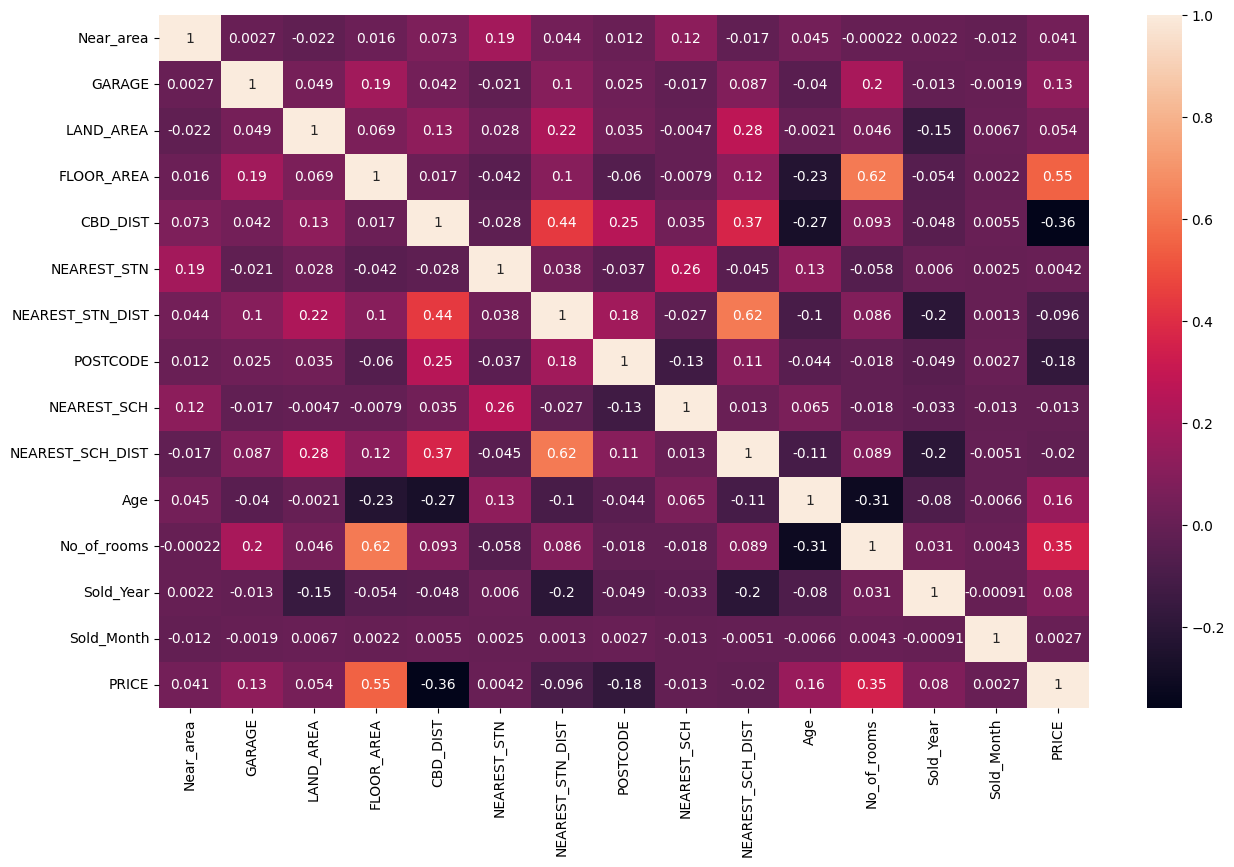

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True)

In [24]:
X.columns

Index(['Near_area', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'CBD_DIST',
       'NEAREST_STN', 'NEAREST_STN_DIST', 'POSTCODE', 'NEAREST_SCH',
       'NEAREST_SCH_DIST', 'Age', 'No_of_rooms', 'Sold_Year', 'Sold_Month'],
      dtype='object')

In [25]:
X.drop(columns=['Near_area','NEAREST_STN'],inplace=True)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [27]:
x_train.head()

,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,Age,No_of_rooms,Sold_Year,Sold_Month
13996,2,826,450,17900,3400,6020,119,0.558675,32,8,2018,6
20221,2,726,228,25700,3100,6027,111,0.954126,29,6,2019,5
3873,2,624,260,17100,7200,6065,82,1.264057,20,7,2019,5
32306,2,929,301,11300,3100,6150,92,1.461142,37,6,2018,12
22717,1,810,127,32000,3100,6167,51,0.520332,65,4,2017,2


In [28]:
x_train.shape

(24400, 12)

In [29]:
y_train.shape

(24400,)

In [30]:
x_test.shape

(6101, 12)

In [31]:
y_test.shape

(6101,)

In [32]:
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

In [33]:
x_train.head()

,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,Age,No_of_rooms,Sold_Year,Sold_Month
0,2,826,450,17900,3400,6020,119,0.558675,32,8,2018,6
1,2,726,228,25700,3100,6027,111,0.954126,29,6,2019,5
2,2,624,260,17100,7200,6065,82,1.264057,20,7,2019,5
3,2,929,301,11300,3100,6150,92,1.461142,37,6,2018,12
4,1,810,127,32000,3100,6167,51,0.520332,65,4,2017,2


In [34]:
x_test.head()

,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,Age,No_of_rooms,Sold_Year,Sold_Month
0,2,872,143,38200,510,6168,78,1.132209,51,4,2014,9
1,2,732,108,13900,7200,6064,82,2.297276,37,6,2016,7
2,2,662,187,26100,1300,6028,80,1.069190,30,6,2018,6
3,2,781,143,12000,1800,6022,154,1.414861,48,5,2016,5
4,2,412,150,26200,2400,6112,38,1.003240,10,4,2013,8


In [35]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
column_names=['LAND_AREA','FLOOR_AREA','CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH','NEAREST_SCH_DIST']
x_train[column_names] = std.fit_transform(x_train[column_names])
x_test[column_names] = std.transform(x_test[column_names])

In [36]:
x_train.head()

,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,POSTCODE,NEAREST_SCH,NEAREST_SCH_DIST,Age,No_of_rooms,Sold_Year,Sold_Month
0,2,-0.111378,3.693346,-0.154092,-0.243040,6020,0.871430,-0.725243,32,8,2018,6
1,2,-0.117394,0.618790,0.537704,-0.310982,6027,0.705460,-0.492085,29,6,2019,5
2,2,-0.123530,1.061969,-0.225046,0.617555,6065,0.103817,-0.309351,20,7,2019,5
3,2,-0.105182,1.629793,-0.739458,-0.310982,6150,0.311280,-0.193150,37,6,2018,12
4,1,-0.112341,-0.779994,1.096463,-0.310982,6167,-0.539318,-0.747850,65,4,2017,2


# Model selection

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:
models=[DecisionTreeRegressor,RandomForestRegressor,XGBRegressor]
validate=[]
for i in models:
    le=i()
    le.fit(x_train,y_train)
    y_pred=le.predict(x_train)
    a=r2_score(y_train,y_pred)
    b=mean_absolute_error(y_train,y_pred)
    c=mean_squared_error(y_train,y_pred)
    d=np.sqrt(c)
    validate.append([i.__name__,a,b,c,d])
data_train=pd.DataFrame(validate,columns=['Model','R2_Squre','MAE','MSE','SMSE'])

In [39]:
data_train

,Model,R2_Squre,MAE,MSE,SMSE
0,DecisionTreeRegressor,1.000000,0.000000,0.000000e+00,0.000000
1,RandomForestRegressor,0.976911,32449.522155,2.961730e+09,54421.775454
2,XGBRegressor,0.939583,59978.832000,7.750139e+09,88034.872673


In [40]:
models=[DecisionTreeRegressor,RandomForestRegressor,XGBRegressor]
validate=[]
for i in models:
    le=i()
    le.fit(x_train,y_train)
    y_pred=le.predict(x_test)
    a=r2_score(y_test,y_pred)
    b=mean_absolute_error(y_test,y_pred)
    c=mean_squared_error(y_test,y_pred)
    d=np.sqrt(c)
    validate.append([i.__name__,a,b,c,d])
data_test=pd.DataFrame(validate,columns=['Model','R2_Squre','MAE','MSE','SMSE'])

In [41]:
data_test

,Model,R2_Squre,MAE,MSE,SMSE
0,DecisionTreeRegressor,0.657314,124340.817735,4.280477e+10,206893.130468
1,RandomForestRegressor,0.840718,86638.811991,1.989579e+10,141052.453328
2,XGBRegressor,0.851992,84350.289010,1.848755e+10,135968.924813


In [42]:
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(r2_score(y_test,y_pred))

0.8519924283027649


In [43]:
import pickle

with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [44]:
with open('label_encoder.pkl','wb') as file:
    pickle.dump(lab,file)

In [45]:
with open('stand_scler.pkl','wb') as file:
    pickle.dump(std,file)